<a href="https://colab.research.google.com/github/ianravisingh/Tensorflow-2.0/blob/main/TF2_9_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

print(tf.__version__)

2.15.0


In [41]:
# make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3 # uniformaly distributed between -3 and +3
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

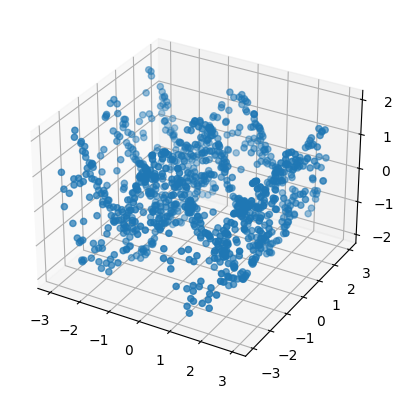

In [42]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
# plt.show()

In [43]:
fig = px.scatter_3d(X[:,0], X[:,1], y)
fig.show()

In [44]:
X.shape

(1000, 2)

In [45]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [46]:
# compile the model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 1.0067
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9107
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9100
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9224
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8871
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8656
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8575
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7882
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7648
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6155
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5637
Epoch 13/100
32/32 [=================

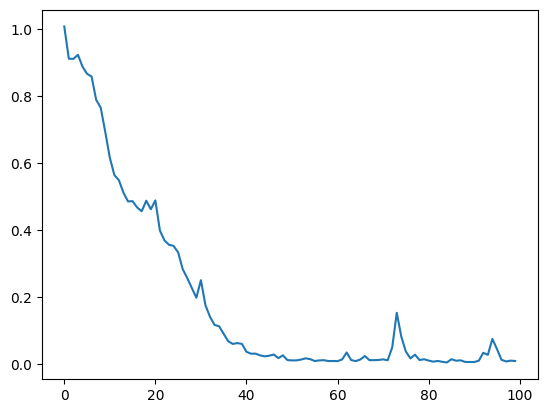

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.show()

79/79 [==============================] - 0s 1ms/step


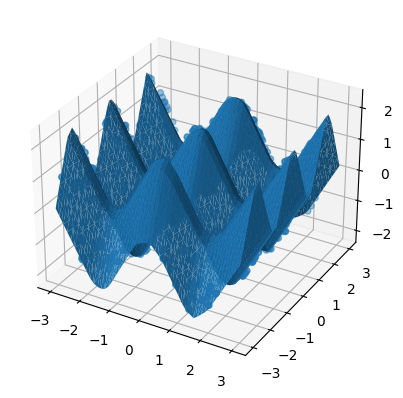

In [48]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_hat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:, 1], y_hat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


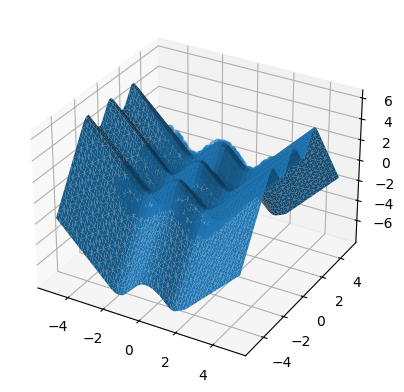

In [49]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()